In [3]:
# to show plots in jupyter notebook
%matplotlib inline  

from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [29]:
# 1.1 Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [30]:
# Check the data
len(train_data), len(test_data)
train_data[0]
#train_labels

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [15]:
# Check the review
word_index = imdb.get_word_index()
word_index
reversed_word_index = {v:k for k,v in word_index.items()}
reversed_word_index
decoded_review = " ".join([reversed_word_index.get(idx -3 , '?') for idx in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
print(max([max(item) for item in train_data]))
# 1.2 Encoding the data into binary vectors/ one-hot encoded
def vectorized_sequences(sequences, dimension=10000):
    # create a matrix of size len(sequences), dimension
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set specific indices of sequence to 1s
    return results
# Vectorized training data
x_train = vectorized_sequences(train_data)
# Vectorized test data
x_test = vectorized_sequences(test_data)

x_train[0][:20]

9999


array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [31]:
# 1.3 Encoding the labels
# Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [32]:
# 1.4 Split train into train-val data
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [33]:
# 2. Create a model/network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
# 3. Create optimizer, loss_function, evaluation_metrics
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
# 4. Iterate/fit/train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 7s 474us/step - loss: 0.5043 - acc: 0.7897 - val_loss: 0.3777 - val_acc: 0.8700
Epoch 2/4
15000/15000 [==============================] - 5s 324us/step - loss: 0.2992 - acc: 0.9046 - val_loss: 0.3001 - val_acc: 0.8898
Epoch 3/4
15000/15000 [==============================] - 5s 302us/step - loss: 0.2174 - acc: 0.9283 - val_loss: 0.3073 - val_acc: 0.8723
Epoch 4/4
15000/15000 [==============================] - 5s 310us/step - loss: 0.1748 - acc: 0.9437 - val_loss: 0.2822 - val_acc: 0.8850


In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

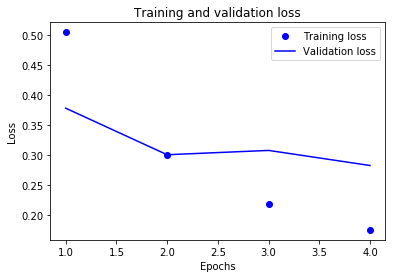

In [37]:
# 5. Plot loss and accuracy
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

# Plot loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

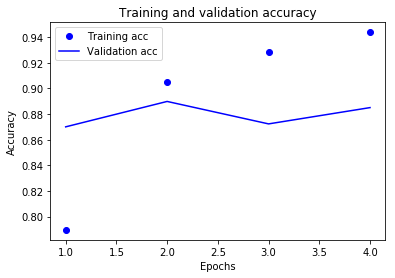

In [38]:
# Plot accuracy
plt.clf()  # clear figure

# Plot acc
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [39]:
# 6. Evaluate test data
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 7s 269us/step


[0.30451045680999755, 0.87564]

In [41]:
# 7. Predict test data
result = model.predict(x_test)
result

array([[0.2436229 ],
       [0.99754804],
       [0.8109886 ],
       ...,
       [0.09275236],
       [0.1133557 ],
       [0.3742508 ]], dtype=float32)

In [43]:
max(result), min(result)

(array([0.99999917], dtype=float32), array([4.6962825e-09], dtype=float32))